In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values.astype('float64')
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 
train_Features[:2]

array([[-0.78652057, -0.92291831, -0.85279033,  1.66771891,  2.50066177,
        -0.30234447, -0.75709354,  0.11897474,  1.03614762, -0.34260922],
       [-0.78620426, -0.5094998 , -1.01487715,  0.43856275,  0.16146236,
         0.04867105, -0.0438235 ,  0.38978328,  0.10975752,  0.09210478]])

In [4]:
test_Features[:2]

array([[ 1.1178627 ,  0.31650325,  1.1115073 , -1.22328702, -1.193192  ,
        -0.32306924,  1.40999567, -0.6356746 , -1.01137697,  1.58440057],
       [-0.62216776, -0.24055754,  0.03995681, -0.01163553,  0.19041957,
         0.04494836, -0.36676457, -0.7711581 , -0.14652401, -1.13472806]])

In [5]:
train_Label[:4]

array([0, 1, 0, 1])

In [6]:
train_Features.shape

(15216, 10)

In [7]:
test_Label[:4]

array([1, 1, 0, 1])

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=30,  input_dim=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [14]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=400,verbose=2,callbacks=[early_stopping])

Train on 13694 samples, validate on 1522 samples
Epoch 1/30
 - 1s - loss: 0.6768 - acc: 0.7319 - val_loss: 0.6549 - val_acc: 0.7385
Epoch 2/30
 - 0s - loss: 0.6215 - acc: 0.7542 - val_loss: 0.5823 - val_acc: 0.7477
Epoch 3/30
 - 0s - loss: 0.5440 - acc: 0.7641 - val_loss: 0.5099 - val_acc: 0.7615
Epoch 4/30
 - 0s - loss: 0.4835 - acc: 0.7825 - val_loss: 0.4648 - val_acc: 0.7806
Epoch 5/30
 - 0s - loss: 0.4497 - acc: 0.7948 - val_loss: 0.4417 - val_acc: 0.7891
Epoch 6/30
 - 0s - loss: 0.4318 - acc: 0.8012 - val_loss: 0.4295 - val_acc: 0.7937
Epoch 7/30
 - 0s - loss: 0.4216 - acc: 0.8045 - val_loss: 0.4213 - val_acc: 0.7983
Epoch 8/30
 - 0s - loss: 0.4145 - acc: 0.8087 - val_loss: 0.4156 - val_acc: 0.8049
Epoch 9/30
 - 0s - loss: 0.4093 - acc: 0.8130 - val_loss: 0.4111 - val_acc: 0.8075
Epoch 10/30
 - 0s - loss: 0.4047 - acc: 0.8163 - val_loss: 0.4065 - val_acc: 0.8134
Epoch 11/30
 - 0s - loss: 0.4006 - acc: 0.8187 - val_loss: 0.4021 - val_acc: 0.8167
Epoch 12/30
 - 0s - loss: 0.3969 - a

In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

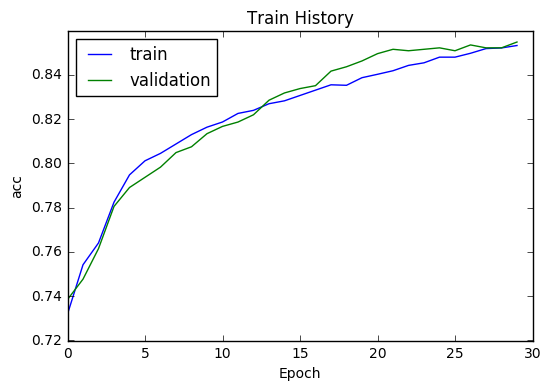

In [16]:
show_train_history(train_history,'acc','val_acc')

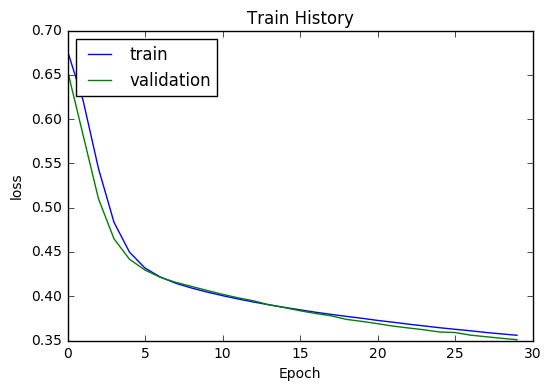

In [17]:
show_train_history(train_history,'loss','val_loss')

In [18]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3804/3804 [==============================] - 0s 40us/step


In [19]:
scores[1]

0.8506834908740127